In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

carli_df = fetch_california_housing(as_frame=True)
#print(carli_df.DESCR)
#dataset1 = pd.DataFrame(dataset.fetch_california_housing)
carli_df.DESCR
carli_df.frame.head(5)





ModuleNotFoundError: No module named 'pandas'

In [ ]:
#print(carli_df.target.head())

<AxesSubplot:xlabel='MedInc', ylabel='MedHouseVal'>

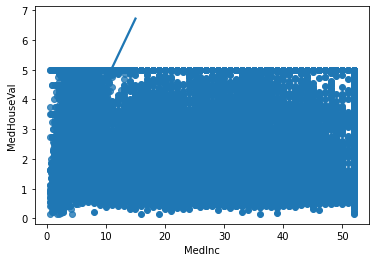

In [ ]:
import seaborn as sns 

#carli_df['Price']=carli_df.target
#carli_df.frame.info()

#check if data is null
#carli_df.frame.isnull()
#check for corelation
carli_df.frame.corr()
#sns.pairplot(carli_df.frame, hue= 'MedHouseVal')
plt.scatter(carli_df.frame.HouseAge,carli_df.frame.MedHouseVal)
plt.xlabel("HouseAge")
plt.ylabel("MedHouseVal")
sns.regplot(x="MedInc", y="MedHouseVal", data = carli_df.frame)


In [ ]:
X=carli_df.frame.iloc[:, :-1]
y=carli_df.frame.iloc[:, -1]
X_train, X_test, y_test, y_train = train_test_split(X, y, test_size=0.5, random_state=20)
X_train
#y_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
979,5.5000,10.0,5.837147,1.076716,1813.0,2.440108,37.67,-121.87
13894,1.5491,9.0,5.641834,1.163324,805.0,2.306590,34.13,-116.35
14383,4.0268,44.0,5.657718,0.956376,712.0,2.389262,32.74,-117.24
16425,2.2619,13.0,5.099042,1.142173,1768.0,2.824281,38.13,-121.47
12478,1.6116,52.0,3.706250,1.065625,1038.0,3.243750,38.59,-121.48
...,...,...,...,...,...,...,...,...
1607,2.9167,24.0,4.766719,1.056765,1750.0,1.360809,37.87,-122.08
3915,3.8516,37.0,5.492958,0.968310,763.0,2.686620,34.19,-118.52
14729,4.4583,31.0,5.982222,0.988889,1129.0,2.508889,32.80,-117.02
4367,5.7778,41.0,5.274399,1.046676,1364.0,1.929279,34.10,-118.27


In [ ]:
#standardizing the dataset to make our independent feature in thesame scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[ 0.86107084, -1.48283096,  0.18950299, ..., -0.10114684,
         0.96165107, -1.15408542],
       [-1.21730164, -1.56219294,  0.10043794, ..., -0.1254672 ,
        -0.70002749,  1.61277624],
       [ 0.08609341,  1.21547643,  0.10768138, ..., -0.11040849,
        -1.35249449,  1.16666992],
       ...,
       [ 0.31308415,  0.18377067,  0.25565918, ..., -0.08861826,
        -1.32433045,  1.2769434 ],
       [ 1.00720764,  0.97739049, -0.06711685, ..., -0.19419495,
        -0.71410951,  0.65038958],
       [-0.07593011,  1.3742004 , -0.44994828, ..., -0.23961743,
         1.01797916, -1.44480639]])

In [ ]:
#training the model
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train) # creates a hyperplane in the train data
LinearRegression()
print(regression.coef_) #this values are equivalent to the number of independent features
print(regression.intercept_)


[-0.00750346 -0.00723838 -0.01893529  0.03939783  0.01642749  0.00168324
  0.00199802 -0.00011923]
2.0613020067829457


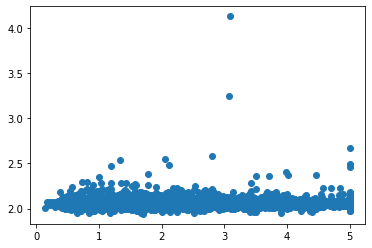

In [ ]:
#Assumptions on performances of linear regression
#lets predict with test data
reg_pred=regression.predict(X_test)
reg_pred
plt.scatter(y_test, reg_pred) # plot a scatter for the prediction

In [ ]:
#residual prediction = the errors
residuals= y_test - reg_pred
residuals

979      0.367553
13894   -1.427041
14383    0.924334
16425   -0.831170
12478   -1.331631
           ...   
1607    -1.063701
3915     0.013977
14729   -0.385440
4367     2.063920
15715    2.917858
Name: MedHouseVal, Length: 10320, dtype: float64

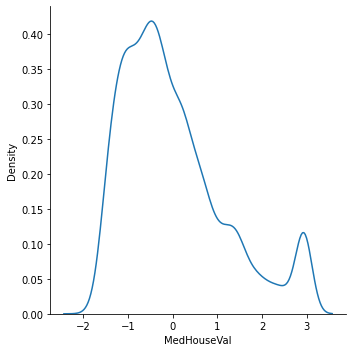

In [ ]:
#plot the residuals
sns.displot(residuals, kind="kde")

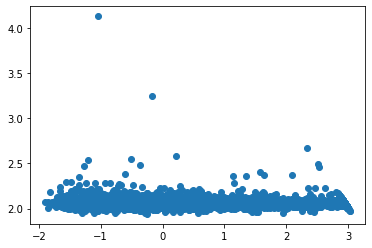

In [ ]:
# lets calculate the scatter plot with resspect to prediction and residual
plt.scatter(residuals, reg_pred)


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


print(mean_absolute_error(y_test, reg_pred))
print(mean_squared_error(y_test, reg_pred))
print(np.sqrt(mean_squared_error(y_test, reg_pred)))

0.9084354868171406
1.3288917125654363
1.1527756557827877


In [ ]:
from sklearn.metrics import r2_score
score =r2_score(y_test, reg_pred)
print(score)

-0.00042853551019161884
